# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# join two dataframes in python: 
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [6]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity'],
      dtype='object')

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  price  \
0                                             0                    0  154.6   
1                                             7                    1  299.0   

   quantity              clean_categories           clean_subcategories  \
0        23             Literacy_Language                  ESL Literacy   
1         1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:44<00:00, 2454.19it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [20]:
project_data["essay"]=preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [21]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:01<00:00, 55519.62it/s]


In [22]:
print(project_data['project_title'].values[20000])
project_data['project_title']=preprocessed_project_title
print(project_data['project_title'].values[20000])

We Need To Move It While We Input It!
need move input


# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [23]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

In [24]:
sampling=False
undersampling=True
if (not sampling):
    print("Total data ",project_data.shape)
    
else:
    if(sampling and undersampling):
        print("Total data ",project_data.shape)
        project_data_negative=project_data[project_data.project_is_approved==0]
        project_data_positive=project_data[project_data.project_is_approved==1]
        project_data_positive=project_data_positive.sample(n=project_data_negative.shape[0],random_state=42)
        print("Positive points: ",project_data_positive.shape[0])
        print("Negaitive points: ",project_data_negative.shape[0])
        project_data=pd.concat([project_data_positive,project_data_negative])
    else:
        print("Total data ",project_data.shape)
        project_data_negative=project_data[project_data.project_is_approved==0]
        project_data_positive=project_data[project_data.project_is_approved==1]
        project_data_negative=project_data_negative.sample(n=project_data_positive.shape[0],replace=True,random_state=42)
        print("Positive points: ",project_data_positive.shape[0])
        print("Negaitive points: ",project_data_negative.shape[0])
        project_data=pd.concat([project_data_positive,project_data_negative])

#data_point_size=50000
#project_data=project_data.sample(n=data_point_size,random_state=42,replace=True)
print("positive and negative counts")
print(project_data.project_is_approved.value_counts())
project_data_Y=project_data.project_is_approved
#project_data_X=project_data.drop(columns=['project_is_approved'])
project_data_X=project_data
print("After sampling: ",project_data_X.shape)

Total data  (109248, 20)
positive and negative counts
1    92706
0    16542
Name: project_is_approved, dtype: int64
After sampling:  (109248, 20)


In [25]:
from sklearn.model_selection import train_test_split
project_data_X_train,project_data_X_test,project_data_Y_train,project_data_Y_test=train_test_split(project_data_X,project_data_Y,test_size=0.2, random_state=42)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h2>2.2.1 Categorical features </h2>

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

In [27]:
#print(project_data_X_train.clean_categories.value_counts())
counts_positive=[]
counts_negative=[]
total_positive=project_data_X_train[project_data_X_train['project_is_approved']==1]
total_neagtive=project_data_X_train[project_data_X_train['project_is_approved']==0]
#print("total positive",total_positive.shape)
#print("total_negative",total_neagtive.shape)
for i in sorted_cat_dict.keys():
    #print(i)
    df_positive=project_data_X_train[(project_data_X_train['clean_categories'].str.contains(i)) & (project_data_X_train['project_is_approved']==1)]
    #print(df_positive.shape)
    counts_positive.append(df_positive.shape[0]/total_positive.shape[0])
    df_negaitive=project_data_X_train[(project_data_X_train['clean_categories'].str.contains(i)) & (project_data_X_train['project_is_approved']==0)]
    #print(df_negaitive.shape)
    counts_negative.append(df_negaitive.shape[0]/total_neagtive.shape[0])

#print(counts_positive)
#print(counts_negative)

def feature_count_positive(x):
    final_value=0
    for i,j in enumerate(sorted_cat_dict.keys()):
        if x.find(j):
            final_value+=counts_positive[i]
    return final_value if final_value!=0 else 0.5

def feature_count_negative(x):
    final_value=0
    for i,j in enumerate(sorted_cat_dict.keys()):
        if x.find(j):
            final_value+=counts_negative[i]
    return final_value if final_value!=0 else 0.5

#process train data
#for positive response data
project_data_X_train['response_clean_categories_positive'] = project_data_X_train.clean_categories.apply(feature_count_positive)
#print(project_data_X_train['response_clean_categories_positive'].shape)
print(project_data_X_train['response_clean_categories_positive'].head())
#for negative response data
project_data_X_train['response_clean_categories_negative'] = project_data_X_train.clean_categories.apply(feature_count_negative)
#print(project_data_X_train['response_clean_categories_negative'].shape)
print(project_data_X_train['response_clean_categories_negative'].head())

#process test data
#for positive response data
project_data_X_test['response_clean_categories_positive'] = project_data_X_test.clean_categories.apply(feature_count_positive)
#print(project_data_X_test['response_clean_categories_positive'].shape)
print(project_data_X_test['response_clean_categories_positive'].head())

#for negative response data
project_data_X_test['response_clean_categories_negative'] = project_data_X_test.clean_categories.apply(feature_count_negative)
#print(project_data_X_test['response_clean_categories_negative'].shape)
print(project_data_X_test['response_clean_categories_negative'].head())


23690    1.270318
32874    1.270318
50206    1.024726
47892    0.911665
10398    1.345386
Name: response_clean_categories_positive, dtype: float64
23690    1.249509
32874    1.249509
50206    0.985105
47892    0.957281
10398    1.331544
Name: response_clean_categories_negative, dtype: float64
105447    1.024726
69262     1.277207
55966     1.345386
1860      1.306477
35390     1.024726
Name: response_clean_categories_positive, dtype: float64
105447    0.985105
69262     1.246333
55966     1.331544
1860      1.284364
35390     0.985105
Name: response_clean_categories_negative, dtype: float64


In [28]:
counts_positive=[]
counts_negative=[]
total_positive=project_data_X_train[project_data_X_train['project_is_approved']==1]
total_neagtive=project_data_X_train[project_data_X_train['project_is_approved']==0]
#print("total positive",total_positive.shape)
#print("total_negative",total_neagtive.shape)
for i in sorted_sub_cat_dict.keys():
    #print(i)
    df_positive=project_data_X_train[(project_data_X_train['clean_subcategories'].str.contains(i)) & (project_data_X_train['project_is_approved']==1)]
    #print(df_positive.shape)
    counts_positive.append(df_positive.shape[0]/total_positive.shape[0])
    df_negaitive=project_data_X_train[(project_data_X_train['clean_subcategories'].str.contains(i)) & (project_data_X_train['project_is_approved']==0)]
    #print(df_negaitive.shape)
    counts_negative.append(df_negaitive.shape[0]/total_neagtive.shape[0])

#print(counts_positive)
#print(counts_negative)

def feature_count_positive(x):
    final_value=0
    for i,j in enumerate(sorted_sub_cat_dict.keys()):
        if x.find(j):
            final_value+=counts_positive[i]
    return final_value if final_value!=0 else 0.5

def feature_count_negative(x):
    final_value=0
    for i,j in enumerate(sorted_sub_cat_dict.keys()):
        if x.find(j):
            final_value+=counts_negative[i]
    return final_value if final_value!=0 else 0.5

#process train data
#for positive response data
project_data_X_train['response_clean_subcategories_positive'] = project_data_X_train.clean_subcategories.apply(feature_count_positive)
print(project_data_X_train['response_clean_subcategories_positive'].shape)
print(project_data_X_train['response_clean_subcategories_positive'].head())
#for negative response data
project_data_X_train['response_clean_subcategories_negative'] = project_data_X_train.clean_subcategories.apply(feature_count_negative)
print(project_data_X_train['response_clean_subcategories_negative'].shape)
print(project_data_X_train['response_clean_subcategories_negative'].head())

#process test data
#for positive response data
project_data_X_test['response_clean_subcategories_positive'] = project_data_X_test.clean_subcategories.apply(feature_count_positive)
print(project_data_X_test['response_clean_subcategories_positive'].shape)
print(project_data_X_test['response_clean_subcategories_positive'].head())

#for negative response data
project_data_X_test['response_clean_subcategories_negative'] = project_data_X_test.clean_subcategories.apply(feature_count_negative)
print(project_data_X_test['response_clean_subcategories_negative'].shape)
print(project_data_X_test['response_clean_subcategories_negative'].head())

(87398,)
23690    1.521679
32874    1.521679
50206    1.361538
47892    1.411409
10398    1.587742
Name: response_clean_subcategories_positive, dtype: float64
(87398,)
23690    1.525858
32874    1.525858
50206    1.349841
47892    1.420308
10398    1.583774
Name: response_clean_subcategories_negative, dtype: float64
(21850,)
105447    1.567222
69262     1.494311
55966     1.587742
1860      1.561951
35390     1.567222
Name: response_clean_subcategories_positive, dtype: float64
(21850,)
105447    1.551187
69262     1.474520
55966     1.583774
1860      1.543097
35390     1.551187
Name: response_clean_subcategories_negative, dtype: float64


In [29]:
project_data_X_train.teacher_prefix = project_data_X_train.teacher_prefix.replace(np.nan, '', regex=True)
print(project_data_X_train.teacher_prefix.value_counts())
project_data_X_test.teacher_prefix = project_data_X_test.teacher_prefix.replace(np.nan, '', regex=True)
print(project_data_X_test.teacher_prefix.value_counts())

Mrs.       45800
Ms.        31168
Mr.         8519
Teacher     1898
Dr.           11
               2
Name: teacher_prefix, dtype: int64
Mrs.       11469
Ms.         7787
Mr.         2129
Teacher      462
Dr.            2
               1
Name: teacher_prefix, dtype: int64


In [30]:
counts_positive=[]
counts_negative=[]
total_positive=project_data_X_train[project_data_X_train['project_is_approved']==1]
total_neagtive=project_data_X_train[project_data_X_train['project_is_approved']==0]
#print("total positive",total_positive.shape)
#print("total_negative",total_neagtive.shape)
for i in ['Mrs.','Ms.','Mr.','Teacher','Dr.']:
    #print(i)
    df_positive=project_data_X_train[(project_data_X_train['teacher_prefix'].str.contains(i)) & (project_data_X_train['project_is_approved']==1)]
    #print(df_positive.shape)
    counts_positive.append(df_positive.shape[0]/total_positive.shape[0])
    df_negaitive=project_data_X_train[(project_data_X_train['teacher_prefix'].str.contains(i)) & (project_data_X_train['project_is_approved']==0)]
    #print(df_negaitive.shape)
    counts_negative.append(df_negaitive.shape[0]/total_neagtive.shape[0])

#print(counts_positive)
#print(counts_negative)

def feature_count_positive(x):
    final_value=0
    for i,j in enumerate(['Mrs.','Ms.','Mr.','Teacher','Dr.']):
        if x==j:
            final_value+=counts_positive[i]
    return final_value if final_value!=0 else 0.5

def feature_count_negative(x):
    final_value=0
    for i,j in enumerate(['Mrs.','Ms.','Mr.','Teacher','Dr.']):
        if x==j:
            final_value+=counts_negative[i]
    return final_value if final_value!=0 else 0.5

#process train data
#for positive response data
project_data_X_train['response_teacher_prefix_positive'] = project_data_X_train.teacher_prefix.apply(feature_count_positive)
#print(project_data_X_train['response_teacher_prefix_positive'].shape)
print(project_data_X_train['response_teacher_prefix_positive'].head())
#for negative response data
project_data_X_train['response_teacher_prefix_negative'] = project_data_X_train.teacher_prefix.apply(feature_count_negative)
#print(project_data_X_train['response_teacher_prefix_negative'].shape)
print(project_data_X_train['response_teacher_prefix_negative'].head())

#process test data
#for positive response data
project_data_X_test['response_teacher_prefix_positive'] = project_data_X_test.teacher_prefix.apply(feature_count_positive)
#print(project_data_X_test['response_teacher_prefix_positive'].shape)
print(project_data_X_test['response_teacher_prefix_positive'].head())

#for negative response data
project_data_X_test['response_teacher_prefix_negative'] = project_data_X_test.teacher_prefix.apply(feature_count_negative)
#print(project_data_X_test['response_teacher_prefix_negative'].shape)
print(project_data_X_test['response_teacher_prefix_negative'].head())

23690    0.528488
32874    0.528488
50206    0.354568
47892    0.354568
10398    0.528488
Name: response_teacher_prefix_positive, dtype: float64
23690    0.499093
32874    0.499093
50206    0.368139
47892    0.368139
10398    0.499093
Name: response_teacher_prefix_negative, dtype: float64
105447    0.020277
69262     0.528488
55966     0.354568
1860      0.528488
35390     0.354568
Name: response_teacher_prefix_positive, dtype: float64
105447    0.029790
69262     0.499093
55966     0.368139
1860      0.499093
35390     0.368139
Name: response_teacher_prefix_negative, dtype: float64


In [31]:
vocabulary=list(project_data_X_train['project_grade_category'].unique())
counts_positive=[]
counts_negative=[]
total_positive=project_data_X_train[project_data_X_train['project_is_approved']==1]
total_neagtive=project_data_X_train[project_data_X_train['project_is_approved']==0]
#print("total positive",total_positive.shape)
#print("total_negative",total_neagtive.shape)
for i in vocabulary:
    #print(i)
    df_positive=project_data_X_train[(project_data_X_train['project_grade_category'].str.contains(i)) & (project_data_X_train['project_is_approved']==1)]
    #print(df_positive.shape)
    counts_positive.append(df_positive.shape[0]/total_positive.shape[0])
    df_negaitive=project_data_X_train[(project_data_X_train['project_grade_category'].str.contains(i)) & (project_data_X_train['project_is_approved']==0)]
    #print(df_negaitive.shape)
    counts_negative.append(df_negaitive.shape[0]/total_neagtive.shape[0])

#print(counts_positive)
#print(counts_negative)

def feature_count_positive(x):
    final_value=0
    for i,j in enumerate(vocabulary):
        if x==j:
            final_value+=counts_positive[i]
    return final_value if final_value!=0 else 0.5

def feature_count_negative(x):
    final_value=0
    for i,j in enumerate(vocabulary):
        if x==j:
            final_value+=counts_negative[i]
    return final_value if final_value!=0 else 0.5

#process train data
#for positive response data
project_data_X_train['response_project_grade_category_positive'] = project_data_X_train.project_grade_category.apply(feature_count_positive)
#print(project_data_X_train['response_project_grade_category_positive'].shape)
print(project_data_X_train['response_project_grade_category_positive'].head())
#for negative response data
project_data_X_train['response_project_grade_category_negative'] = project_data_X_train.project_grade_category.apply(feature_count_negative)
#print(project_data_X_train['response_project_grade_category_negative'].shape)
print(project_data_X_train['response_project_grade_category_negative'].head())

#process test data
#for positive response data
project_data_X_test['response_project_grade_category_positive'] = project_data_X_test.project_grade_category.apply(feature_count_positive)
#print(project_data_X_test['response_project_grade_category_positive'].shape)
print(project_data_X_test['response_project_grade_category_positive'].head())

#for negative response data
project_data_X_test['response_project_grade_category_negative'] = project_data_X_test.project_grade_category.apply(feature_count_negative)
#print(project_data_X_test['response_project_grade_category_negative'].shape)
print(project_data_X_test['response_project_grade_category_negative'].head())

23690    0.406690
32874    0.406690
50206    0.406690
47892    0.341638
10398    0.153077
Name: response_project_grade_category_positive, dtype: float64
23690    0.405111
32874    0.405111
50206    0.405111
47892    0.328066
10398    0.161273
Name: response_project_grade_category_negative, dtype: float64
105447    0.098595
69262     0.341638
55966     0.098595
1860      0.341638
35390     0.153077
Name: response_project_grade_category_positive, dtype: float64
105447    0.105550
69262     0.328066
55966     0.105550
1860      0.328066
35390     0.161273
Name: response_project_grade_category_negative, dtype: float64


In [32]:
vocabulary=list(project_data_X_train['school_state'].unique())
counts_positive=[]
counts_negative=[]
total_positive=project_data_X_train[project_data_X_train['project_is_approved']==1]
total_neagtive=project_data_X_train[project_data_X_train['project_is_approved']==0]
#print("total positive",total_positive.shape)
#print("total_negative",total_neagtive.shape)
for i in vocabulary:
    #print(i)
    df_positive=project_data_X_train[(project_data_X_train['school_state'].str.contains(i)) & (project_data_X_train['project_is_approved']==1)]
    #print(df_positive.shape)
    counts_positive.append(df_positive.shape[0]/total_positive.shape[0])
    df_negaitive=project_data_X_train[(project_data_X_train['school_state'].str.contains(i)) & (project_data_X_train['project_is_approved']==0)]
    #print(df_negaitive.shape)
    counts_negative.append(df_negaitive.shape[0]/total_neagtive.shape[0])

#print(counts_positive)
#print(counts_negative)

def feature_count_positive(x):
    final_value=0
    for i,j in enumerate(vocabulary):
        if x==j:
            final_value+=counts_positive[i]
    return final_value if final_value!=0 else 0.5

def feature_count_negative(x):
    final_value=0
    for i,j in enumerate(vocabulary):
        if x==j:
            final_value+=counts_negative[i]
    return final_value if final_value!=0 else 0.5

#process train data
#for positive response data
project_data_X_train['response_school_state_positive'] = project_data_X_train.school_state.apply(feature_count_positive)
print(project_data_X_train['response_school_state_positive'].shape)
print(project_data_X_train['response_school_state_positive'].head())
#for negative response data
project_data_X_train['response_school_state_negative'] = project_data_X_train.school_state.apply(feature_count_negative)
print(project_data_X_train['response_school_state_negative'].shape)
print(project_data_X_train['response_school_state_negative'].head())

#process test data
#for positive response data
project_data_X_test['response_school_state_positive'] = project_data_X_test.school_state.apply(feature_count_positive)
print(project_data_X_test['response_school_state_positive'].shape)
print(project_data_X_test['response_school_state_positive'].head())

#for negative response data
project_data_X_test['response_school_state_negative'] = project_data_X_test.school_state.apply(feature_count_negative)
print(project_data_X_test['response_school_state_negative'].shape)
print(project_data_X_test['response_school_state_negative'].head())


(87398,)
23690    0.068085
32874    0.013981
50206    0.020331
47892    0.022273
10398    0.143167
Name: response_school_state_positive, dtype: float64
(87398,)
23690    0.061167
32874    0.015575
50206    0.022834
47892    0.020339
10398    0.133374
Name: response_school_state_negative, dtype: float64
(21850,)
105447    0.046851
69262     0.068085
55966     0.015491
1860      0.011352
35390     0.143167
Name: response_school_state_positive, dtype: float64
(21850,)
105447    0.043853
69262     0.061167
55966     0.016634
1860      0.011266
35390     0.133374
Name: response_school_state_negative, dtype: float64


<h2>2.2.2 Numerical features </h2>

In [33]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data_X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = project_data_X_train['price'].values#price_scalar.transform(project_data_X_train['price'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
price_standardized_test = project_data_X_test['price'].values#price_scalar.transform(project_data_X_test['price'].values.reshape(-1, 1))


Mean : 298.64356770177807, Standard deviation : 368.42853396795914


In [34]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,normalize

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = project_data_X_train['teacher_number_of_previously_posted_projects'].values#price_scalar.transform(project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_test = project_data_X_test['teacher_number_of_previously_posted_projects'].values#price_scalar.transform(project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.102897091466623, Standard deviation : 27.572082372998246


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [35]:
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(project_data_X_train.essay.values)

text_bow_train=vectorizer_essay_bow.fit_transform(project_data_X_train.essay.values)
print(text_bow_train.shape)

text_bow_test=vectorizer_essay_bow.transform(project_data_X_test.essay.values)
print(text_bow_test.shape)

(87398, 15254)
(21850, 15254)


In [36]:
# Similarly you can vectorize for title also
vectorizer_project_title_bow = CountVectorizer(min_df=10)
vectorizer_project_title_bow.fit(project_data_X_train.project_title.values)

title_text_bow_train=vectorizer_project_title_bow.fit_transform(project_data_X_train.project_title.values)
print(title_text_bow_train.shape)

title_text_bow_test=vectorizer_project_title_bow.transform(project_data_X_test.project_title.values)
print(title_text_bow_test.shape)

(87398, 2803)
(21850, 2803)


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf = TfidfVectorizer(min_df=10)
vectorizer_essay_tfidf.fit(project_data_X_train.essay.values)

text_tfidf_train=vectorizer_essay_tfidf.fit_transform(project_data_X_train.essay.values)
print(text_tfidf_train.shape)

text_tfidf_test=vectorizer_essay_tfidf.transform(project_data_X_test.essay.values)
print(text_tfidf_test.shape)

(87398, 15254)
(21850, 15254)


In [38]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_project_title_tfidf = TfidfVectorizer(min_df=10)
vectorizer_project_title_tfidf.fit(project_data_X_train.project_title.values)

title_text_tfidf_train=vectorizer_project_title_tfidf.fit_transform(project_data_X_train.project_title.values)
print(title_text_tfidf_train.shape)

title_text_tfidf_test=vectorizer_project_title_tfidf.transform(project_data_X_test.project_title.values)
print(title_text_tfidf_test.shape)

(87398, 2803)
(21850, 2803)


In [39]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
# borrowed from https://therenegadecoder.com/code/how-to-check-if-a-file-exists-in-python/
import os
exists = os.path.isfile('./glove_vectors')
if(not exists):
    model = loadGloveModel('glove.42B.300d.txt')

    '''# ============================
    Output:

    Loading Glove Model
    1917495it [06:32, 4879.69it/s]
    Done. 1917495  words loaded!

    # ============================'''

    words = []
    for i in preproced_texts:
        words.extend(i.split(' '))

    for i in preproced_titles:
        words.extend(i.split(' '))
    print("all the words in the coupus", len(words))
    words = set(words)
    print("the unique words in the coupus", len(words))

    inter_words = set(model.keys()).intersection(words)
    print("The number of words that are present in both glove vectors and our coupus", \
          len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

    words_courpus = {}
    words_glove = set(model.keys())
    for i in words:
        if i in words_glove:
            words_courpus[i] = model[i]
    print("word 2 vec length", len(words_courpus))


    # stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

    import pickle
    with open('glove_vectors', 'wb') as f:
        pickle.dump(words_courpus, f)
else:
    print("glove already exists. No need to compute")

glove already exists. No need to compute


In [40]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [41]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_train.append(vector)

print(len(avg_w2v_vectors_essay_train))
print(len(avg_w2v_vectors_essay_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 87398/87398 [00:21<00:00, 4161.04it/s]


87398
300


In [42]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essay_test.append(vector)

print(len(avg_w2v_vectors_essay_test))
print(len(avg_w2v_vectors_essay_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:05<00:00, 4065.38it/s]


21850
300


In [43]:
# average Word2Vec
# compute average word2vec for each title.
title_avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_vectors_train.append(vector)

print(len(title_avg_w2v_vectors_train))
print(len(title_avg_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 87398/87398 [00:00<00:00, 91953.56it/s]


87398
300


In [44]:
# average Word2Vec
# compute average word2vec for each title.
title_avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    title_avg_w2v_vectors_test.append(vector)

print(len(title_avg_w2v_vectors_test))
print(len(title_avg_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 89789.33it/s]


21850
300


In [45]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_X_train.essay.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
essay_tfidf_words = set(tfidf_model.get_feature_names())

In [46]:
# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_train.append(vector)

print(len(essay_tfidf_w2v_vectors_train))
print(len(essay_tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 87398/87398 [02:21<00:00, 617.47it/s]


87398
300


In [47]:
# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.essay.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_vectors_test.append(vector)

print(len(essay_tfidf_w2v_vectors_test))
print(len(essay_tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [00:35<00:00, 622.45it/s]


21850
300


In [48]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_X_train.project_title.values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
essay_tfidf_words = set(tfidf_model.get_feature_names())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
title_tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_train.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors_train.append(vector)

print(len(title_tfidf_w2v_vectors_train))
print(len(title_tfidf_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 87398/87398 [00:01<00:00, 44437.37it/s]


87398
300


In [50]:
# average Word2Vec
# compute average word2vec for each review.
title_tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_X_test.project_title.values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in essay_tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    title_tfidf_w2v_vectors_test.append(vector)

print(len(title_tfidf_w2v_vectors_test))
print(len(title_tfidf_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 44259.46it/s]


21850
300


<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.0 Define method to predict based on threshold of AUC

In [51]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [52]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
BOW = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_train,title_text_bow_train))
print(BOW.shape)
BOW_test= hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_test,title_text_bow_test))
print(BOW_test.shape)

(87398, 18067)
(21850, 18067)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(class_weight='balanced')
number_of_base_models=[20,35,50,100,150,200]
depth=[1,3,5,7]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf1 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf1.fit(BOW,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   19.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   24.2s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   59.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:  1.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20, 35, 50, 100, 150, 200], 'max_depth': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [54]:
clf=clf1
clf.best_params_

{'max_depth': 7, 'n_estimators': 200}

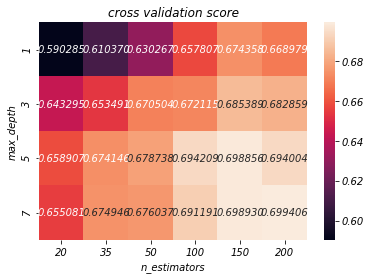

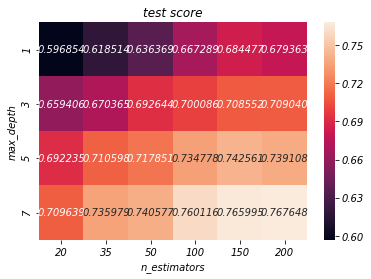

In [56]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 10}, fmt="f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 10}, fmt="f")


In [53]:
from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier(class_weight='balanced',max_depth= 25, n_estimators=1500)
model=RandomForestClassifier(class_weight='balanced',max_depth= 3, n_estimators=150)
model.fit(BOW,project_data_Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

AUC: 0.667
AUC: 0.686


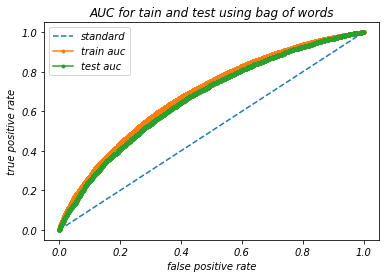

In [54]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(BOW_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(BOW)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.3875498659718786 for threshold 0.499
2069 1247 7022 11512
true positive rate 0.6211287363763893
true negaitive rate 0.6239445114595898
[[2069, 7022], [1247, 11512]]


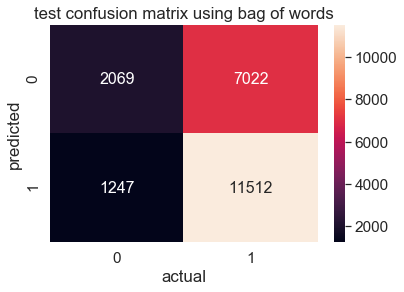

In [55]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(BOW_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.40570479881244964 for threshold 0.499
8459 4767 27122 47050
true positive rate 0.6343364072695896
true negaitive rate 0.6395735672160895
[[8459, 27122], [4767, 47050]]


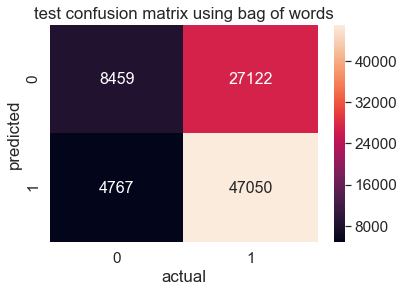

In [56]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(BOW)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
#tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [57]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

TFIDF = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_train,title_text_bow_train,text_tfidf_train,title_text_tfidf_train))
print(TFIDF.shape)

TFIDF_test = hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_test,title_text_bow_test,text_tfidf_test,title_text_tfidf_test))
print(TFIDF_test.shape)

(87398, 36124)
(21850, 36124)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(class_weight='balanced')
number_of_base_models=[20,35,50,100,150,200]
depth=[1,3,5,7]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf2 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf2.fit(TFIDF,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    9.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   36.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   46.9s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:  3.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20, 35, 50, 100, 150, 200], 'max_depth': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [62]:
clf=clf2
clf.best_params_

{'max_depth': 7, 'n_estimators': 200}

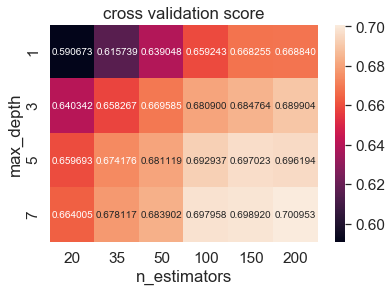

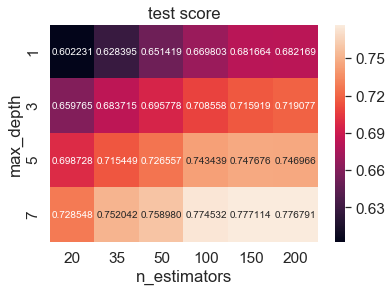

In [63]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 10}, fmt="f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 10}, fmt="f")


In [58]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced',max_depth= 3, n_estimators=150)
model.fit(TFIDF,project_data_Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

AUC: 0.683
AUC: 0.701


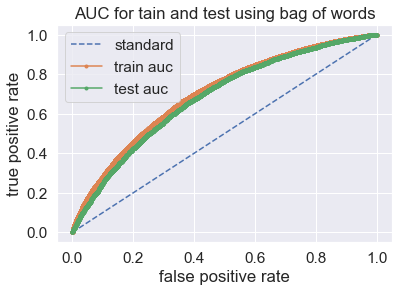

In [59]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(TFIDF_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(TFIDF)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.4055942308225498 for threshold 0.499
2069 1247 6486 12048
true positive rate 0.6500485594043379
true negaitive rate 0.6239445114595898
[[2069, 6486], [1247, 12048]]


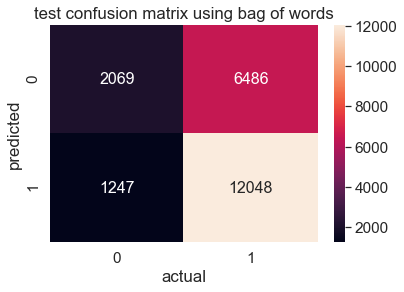

In [60]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.42291556885704557 for threshold 0.499
8449 4777 25068 49104
true positive rate 0.6620287979291377
true negaitive rate 0.6388174807197944
[[8449, 25068], [4777, 49104]]


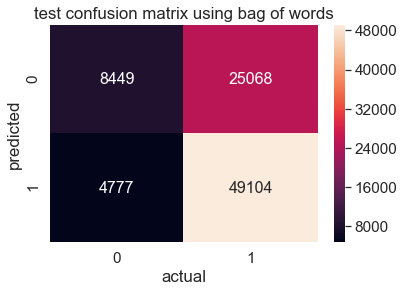

In [61]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [62]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# conver list of lists to sparse matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import hstack,csr_matrix
# with same hstack function we are concatinating a sparse matrix and a dense matirx :)
a=csr_matrix(avg_w2v_vectors_essay_train)
#print(a.shape)
b=csr_matrix(avg_w2v_vectors_essay_test)
#print(b.shape)
c=csr_matrix(title_avg_w2v_vectors_train)
#print(c.shape)
d=csr_matrix(title_avg_w2v_vectors_test)
#print(d.shape)

AVG_W2V = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),a,c))
print(AVG_W2V.shape)
AVG_W2V_test = hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),b,d))
print(AVG_W2V_test.shape)

(87398, 610)
(21850, 610)


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(class_weight='balanced')
number_of_base_models=[20,35,50,100,150,200]
depth=[1,3,5,7]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf3 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf3.fit(AVG_W2V,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   29.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   53.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  9.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 19.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20, 35, 50, 100, 150, 200], 'max_depth': [1, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [69]:
clf=clf3
clf.best_params_

{'max_depth': 7, 'n_estimators': 150}

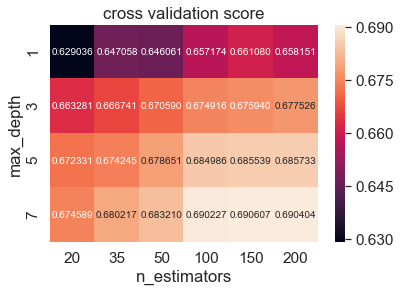

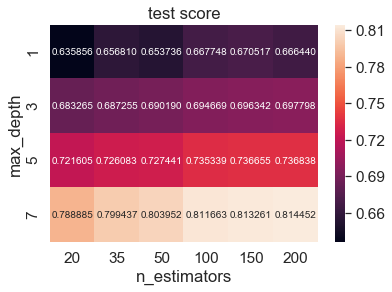

In [70]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 10}, fmt="f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 10}, fmt="f")


In [63]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced',max_depth= 3, n_estimators=200)
model.fit(AVG_W2V,project_data_Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

AUC: 0.677
AUC: 0.691


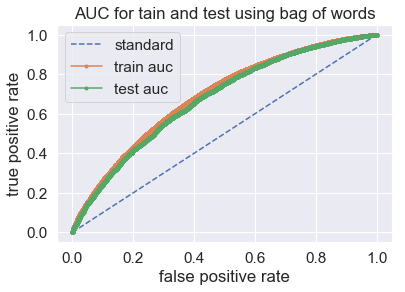

In [64]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(AVG_W2V_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(AVG_W2V)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.3943980371613191 for threshold 0.498
1941 1375 6046 12488
true positive rate 0.6737887126362361
true negaitive rate 0.5853437876960192
[[1941, 6046], [1375, 12488]]


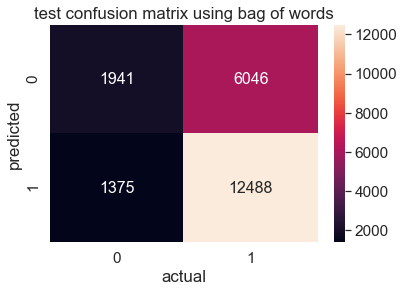

In [65]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(AVG_W2V_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.40860048206049315 for threshold 0.499
8173 5053 25128 49044
true positive rate 0.6612198673353826
true negaitive rate 0.6179494934220475
[[8173, 25128], [5053, 49044]]


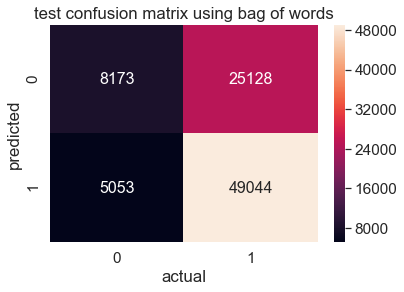

In [66]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(AVG_W2V)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
#tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [67]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# conver list of lists to sparse matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import hstack,csr_matrix
a=csr_matrix(essay_tfidf_w2v_vectors_train)
#print(a.shape)
b=csr_matrix(essay_tfidf_w2v_vectors_test)
#print(b.shape)
c=csr_matrix(title_tfidf_w2v_vectors_train)
#print(c.shape)
d=csr_matrix(title_tfidf_w2v_vectors_test)
#print(d.shape)
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
TFIDF_W2V = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),a,c))
print(TFIDF_W2V.shape)
TFIDF_W2V_test = hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),b,d))
print(TFIDF_W2V_test.shape)

(87398, 610)
(21850, 610)


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier(class_weight='balanced')
number_of_base_models=[20,35,50,100,200,250]
depth=[1,2,3,5]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf4 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf4.fit(TFIDF_W2V,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   23.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  7.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 10.1min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 15.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20, 35, 50, 100, 200, 250], 'max_depth': [1, 2, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [79]:
clf=clf4
clf.best_params_

{'max_depth': 5, 'n_estimators': 250}

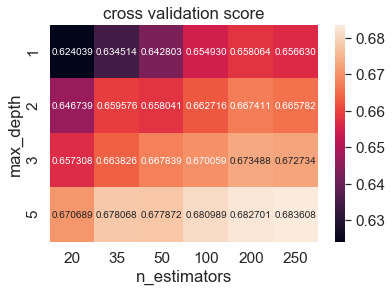

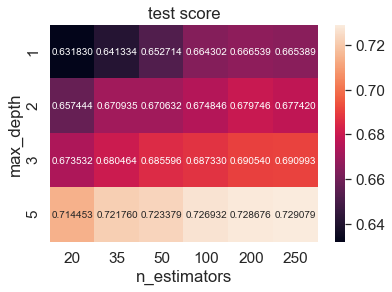

In [80]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 10}, fmt="f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 10}, fmt="f")


In [77]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced',max_depth= 3, n_estimators=200)
model.fit(TFIDF_W2V,project_data_Y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

AUC: 0.673
AUC: 0.683


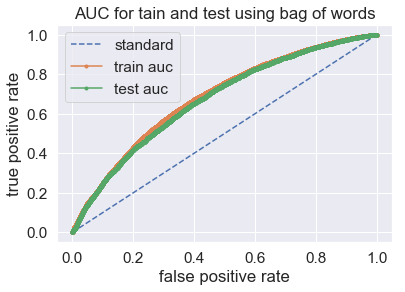

In [78]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(TFIDF_W2V_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(TFIDF_W2V)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.39298544727825874 for threshold 0.496
2024 1292 6601 11933
true positive rate 0.6438437466278192
true negaitive rate 0.6103739445114595
[[2024, 6601], [1292, 11933]]


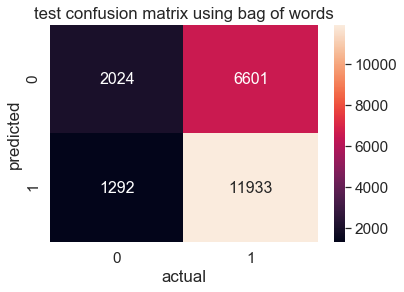

In [79]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_W2V_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.4037491064515719 for threshold 0.499
8613 4613 28186 45986
true positive rate 0.6199913714069999
true negaitive rate 0.6512172992590353
[[8613, 28186], [4613, 45986]]


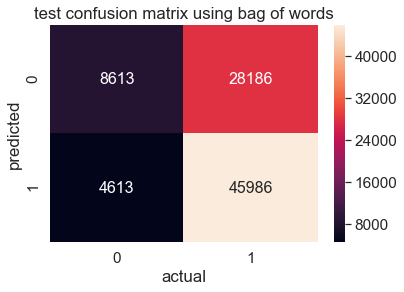

In [80]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_W2V)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
BOW = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_train,title_text_bow_train))
print(BOW.shape)
BOW_test= hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_test,title_text_bow_test))
print(BOW_test.shape)

(87398, 18067)
(21850, 18067)


In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model=XGBClassifier(class_weight='balanced')
number_of_base_models=[5,10,20,35,50,100,200,500]
depth=[1,2,3]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf1 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf1.fit(BOW,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   13.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   38.8s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 11.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [5, 10, 20, 35, 50, 100, 200, 500], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [86]:
clf=clf1
clf.best_params_

{'max_depth': 3, 'n_estimators': 500}

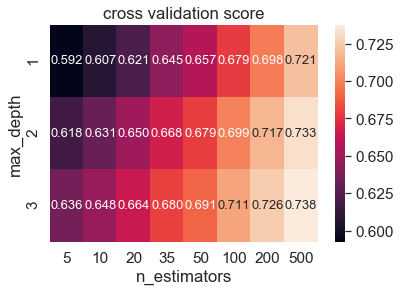

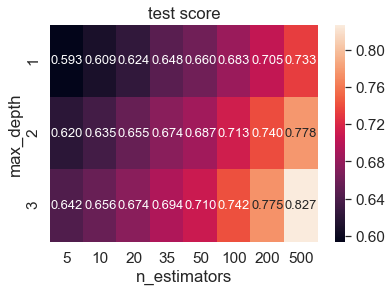

In [92]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 13}, fmt=".3f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 13}, fmt=".3f")


In [82]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth= 1, n_estimators=500,random_state=42)
model.fit(BOW,project_data_Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

AUC: 0.723
AUC: 0.730


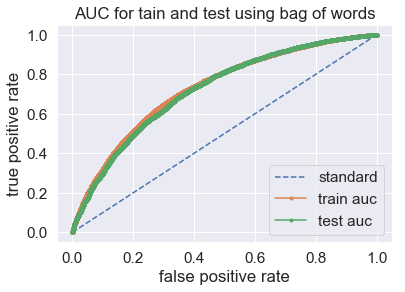

In [83]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(BOW_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(BOW)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.4457194894838723 for threshold 0.832
2181 1135 5974 12560
true positive rate 0.677673464983274
true negaitive rate 0.6577201447527141
[[2181, 5974], [1135, 12560]]


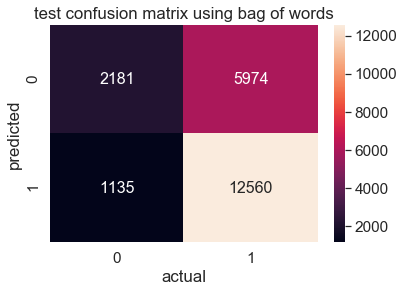

In [84]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(BOW_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.4540409461347475 for threshold 0.834
8968 4258 24505 49667
true positive rate 0.6696192633338727
true negaitive rate 0.678058369877514
[[8968, 24505], [4258, 49667]]


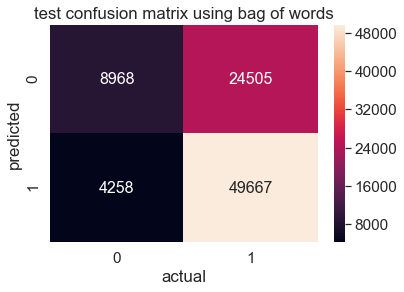

In [85]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(BOW)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [86]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

TFIDF = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_train,title_text_bow_train,text_tfidf_train,title_text_tfidf_train))
print(TFIDF.shape)

TFIDF_test = hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),text_bow_test,title_text_bow_test,text_tfidf_test,title_text_tfidf_test))
print(TFIDF_test.shape)

(87398, 36124)
(21850, 36124)


In [102]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model=XGBClassifier(class_weight='balanced')
number_of_base_models=[5,10,20,35,50,100,200,500]
depth=[1,2,3]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf2 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf2.fit(TFIDF,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   21.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   41.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 10.2min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 22.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [5, 10, 20, 35, 50, 100, 200, 500], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [103]:
clf=clf2
clf.best_params_

{'max_depth': 3, 'n_estimators': 500}

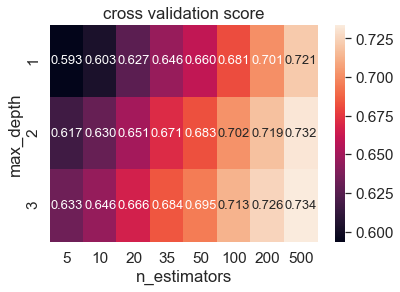

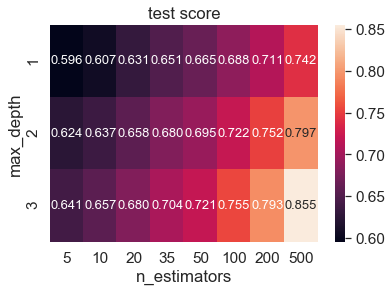

In [104]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 13}, fmt=".3f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 13}, fmt=".3f")


In [87]:
from sklearn.ensemble import RandomForestClassifier
model=XGBClassifier(max_depth= 1, n_estimators=200,random_state=42)
model.fit(TFIDF,project_data_Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=1, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

AUC: 0.704
AUC: 0.708


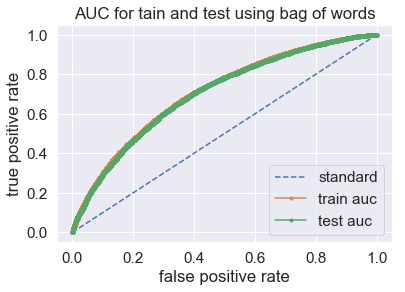

In [88]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(TFIDF_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(TFIDF)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.4259845433873494 for threshold 0.839
2175 1141 6497 12037
true positive rate 0.6494550555735406
true negaitive rate 0.6559107358262968
[[2175, 6497], [1141, 12037]]


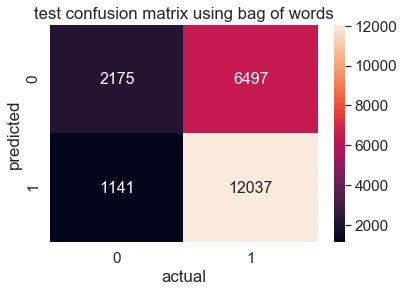

In [89]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.42816838427516557 for threshold 0.836
8479 4747 24634 49538
true positive rate 0.6678800625572993
true negaitive rate 0.6410857402086799
[[8479, 24634], [4747, 49538]]


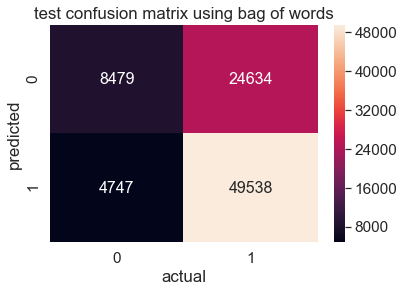

In [90]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [91]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# conver list of lists to sparse matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import hstack,csr_matrix
# with same hstack function we are concatinating a sparse matrix and a dense matirx :)
a=csr_matrix(avg_w2v_vectors_essay_train)
#print(a.shape)
b=csr_matrix(avg_w2v_vectors_essay_test)
#print(b.shape)
c=csr_matrix(title_avg_w2v_vectors_train)
#print(c.shape)
d=csr_matrix(title_avg_w2v_vectors_test)
#print(d.shape)

AVG_W2V = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),a,c))
print(AVG_W2V.shape)
AVG_W2V_test = hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),b,d))
print(AVG_W2V_test.shape)

(87398, 610)
(21850, 610)


In [106]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model=XGBClassifier(class_weight='balanced')
number_of_base_models=[5,10,20,35,50,100,200,500]
depth=[1,2,3]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf3 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf3.fit(AVG_W2V,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   58.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 33.0min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 62.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 72.5min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 112.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [5, 10, 20, 35, 50, 100, 200, 500], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [107]:
clf=clf3
clf.best_params_

{'max_depth': 2, 'n_estimators': 500}

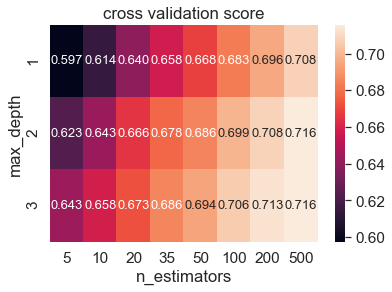

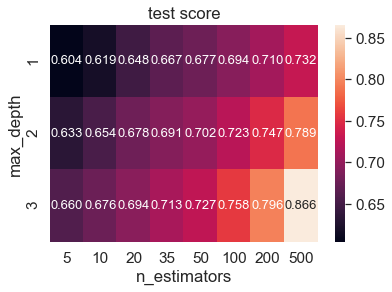

In [108]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 13}, fmt=".3f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 13}, fmt=".3f")


In [92]:
from sklearn.ensemble import RandomForestClassifier
model=XGBClassifier(class_weight='balanced',max_depth= 1, n_estimators=200,random_state=42)
model.fit(AVG_W2V,project_data_Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

AUC: 0.700
AUC: 0.707


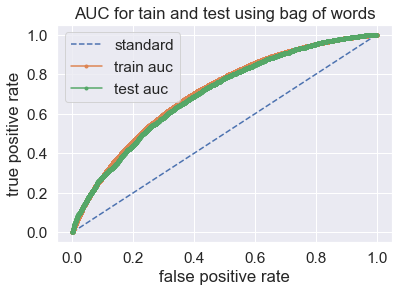

In [93]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(AVG_W2V_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(AVG_W2V)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.41673565603618584 for threshold 0.845
2190 1126 6839 11695
true positive rate 0.6310024819251107
true negaitive rate 0.6604342581423401
[[2190, 6839], [1126, 11695]]


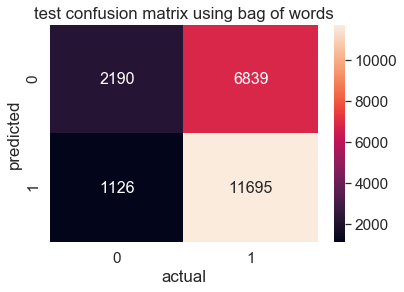

In [95]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(AVG_W2V_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.4251712248655878 for threshold 0.841
8564 4662 25469 48703
true positive rate 0.6566224451275414
true negaitive rate 0.6475124754271888
[[8564, 25469], [4662, 48703]]


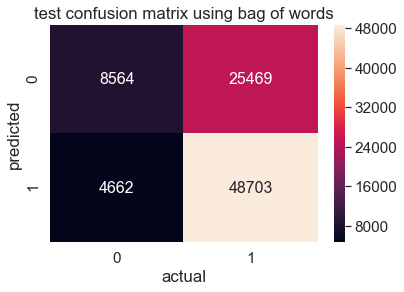

In [96]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(AVG_W2V)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [97]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# conver list of lists to sparse matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import hstack,csr_matrix
a=csr_matrix(essay_tfidf_w2v_vectors_train)
#print(a.shape)
b=csr_matrix(essay_tfidf_w2v_vectors_test)
#print(b.shape)
c=csr_matrix(title_tfidf_w2v_vectors_train)
#print(c.shape)
d=csr_matrix(title_tfidf_w2v_vectors_test)
#print(d.shape)
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
TFIDF_W2V = hstack((project_data_X_train.response_clean_categories_negative.values.reshape(-1,1),project_data_X_train.response_clean_categories_positive.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_train.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_train.response_school_state_negative.values.reshape(-1,1),project_data_X_train.response_school_state_positive.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_train.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_train['price'].values.reshape(-1,1),project_data_X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),a,c))
print(TFIDF_W2V.shape)
TFIDF_W2V_test = hstack((project_data_X_test.response_clean_categories_negative.values.reshape(-1,1),project_data_X_test.response_clean_categories_positive.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_negative.values.reshape(-1,1),project_data_X_test.response_clean_subcategories_positive.values.reshape(-1,1),project_data_X_test.response_school_state_negative.values.reshape(-1,1),project_data_X_test.response_school_state_positive.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_negative.values.reshape(-1,1),project_data_X_test.response_teacher_prefix_positive.values.reshape(-1,1),project_data_X_test['price'].values.reshape(-1,1),project_data_X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1),b,d))
print(TFIDF_W2V_test.shape)

(87398, 610)
(21850, 610)


In [110]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model=XGBClassifier(class_weight='balanced')
number_of_base_models=[5,10,20,35,50,100,200,500]
depth=[1,2,3]
parameters = {'n_estimators': number_of_base_models, 'max_depth':depth}
clf4 = GridSearchCV(model, parameters,scoring='roc_auc',n_jobs=4,verbose=10)
clf4.fit(TFIDF_W2V,project_data_Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 12.5min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 16.7min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 21.1min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 31.2min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 40.5min
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed: 66.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [5, 10, 20, 35, 50, 100, 200, 500], 'max_depth': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [111]:
clf=clf4
clf.best_params_

{'max_depth': 3, 'n_estimators': 500}

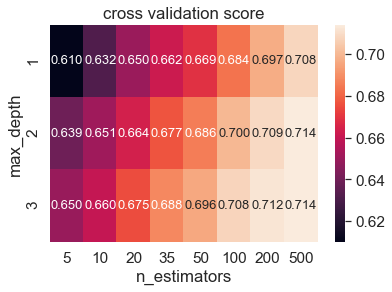

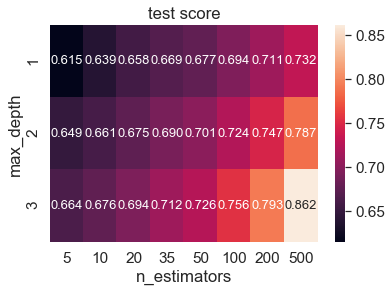

In [112]:
#https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
max_depth_all=[]
min_samples_split_all=[]
for i in range (0,len(clf.cv_results_['params'])):
    max_depth_all.append(clf.cv_results_['params'][i]['max_depth'])
    min_samples_split_all.append(clf.cv_results_['params'][i]['n_estimators'])
#print(max_depth_all)
#print(min_samples_split_all)
cv_score_all=clf.cv_results_['mean_test_score']
#print(cv_score_all)
cv_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'cv_auc': cv_score_all
    })
cv_data=cv_data.pivot('max_depth','n_estimators','cv_auc')
plt.figure(112)
plt.title("cross validation score")
sns.heatmap(cv_data, annot=True,annot_kws={"size": 13}, fmt=".3f")

train_score_all=clf.cv_results_['mean_train_score']
#print(train_score_all)
tain_data=pd.DataFrame(
    {'max_depth': max_depth_all,
     'n_estimators': min_samples_split_all,
     'train_auc': train_score_all
    })
tain_data=tain_data.pivot('max_depth','n_estimators','train_auc')
plt.figure(122)
plt.title("test score")
sns.heatmap(tain_data, annot=True,annot_kws={"size": 13}, fmt=".3f")


In [98]:
from sklearn.ensemble import RandomForestClassifier
model=XGBClassifier(class_weight='balanced',max_depth= 1, n_estimators=200,random_state=42)
model.fit(TFIDF_W2V,project_data_Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=1, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

AUC: 0.701
AUC: 0.708


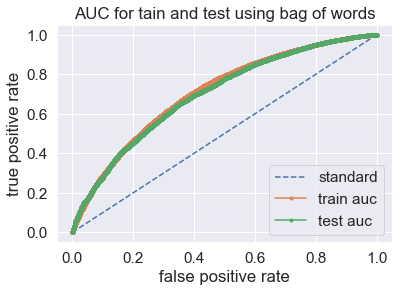

In [99]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tqdm import tqdm

probs_test = model.predict_proba(TFIDF_W2V_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
auc_test = roc_auc_score(project_data_Y_test, probs_test)
print('AUC: %.3f' % auc_test)
fpr, tpr, thresholds = roc_curve(project_data_Y_test, probs_test)

probs_train = model.predict_proba(TFIDF_W2V)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
auc_train = roc_auc_score(project_data_Y_train, probs_train)
print('AUC: %.3f' % auc_train)
fpr1, tpr1, thresholds1 = roc_curve(project_data_Y_train, probs_train)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, marker='.')
plt.plot(fpr, tpr, marker='.')

plt.legend({"standard":"","train auc":"","test auc":""})
plt.title("AUC for tain and test using bag of words")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

the maximum value of tpr*(1-fpr) 0.4210163325173062 for threshold 0.84
2145 1171 6471 12063
true positive rate 0.6508578828099708
true negaitive rate 0.6468636911942099
[[2145, 6471], [1171, 12063]]


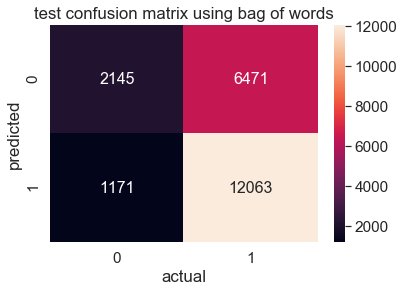

In [100]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_W2V_test)
tn, fp, fn, tp = confusion_matrix(project_data_Y_test, predict(probs_test, thresholds, fpr, tpr)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

the maximum value of tpr*(1-fpr) 0.42856503406866303 for threshold 0.836
8415 4811 24211 49961
true positive rate 0.6735830232432723
true negaitive rate 0.6362467866323908
[[8415, 24211], [4811, 49961]]


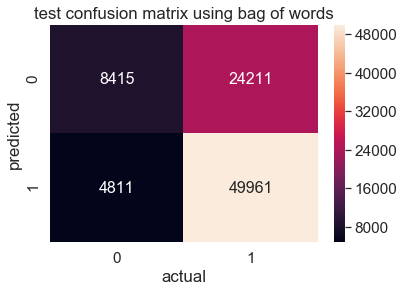

In [101]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#compute confudion matrix values and plot
from sklearn.metrics import confusion_matrix
predicted_bow_test=model.predict(TFIDF_W2V)
tn, fp, fn, tp = confusion_matrix(project_data_Y_train, predict(probs_train, thresholds1, fpr1, tpr1)).ravel()
print(tn, fp, fn, tp)
print("true positive rate",(tp/(tp+fn)))
print("true negaitive rate",(tn/(tn+fp)))
matrix=[[tn,fn],[fp,tp]]
print(matrix)
df_cm = pd.DataFrame(matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')# font size
plt.title("test confusion matrix using bag of words")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

<h1>3. Conclusion</h1>

In [119]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","n_estimators", "max_depth", "AUC"]
x.add_row(["BAG of words", "Random Forest", 150, 3, 0.667])
x.add_row(["TFIDF", "Random Forest" , 150, 3, 0.683])
x.add_row(["Average W2V", "Random Forest",200, 3, 0.677])
x.add_row(["TFIDF W2V", "Random Forest" ,200,  3, 0.673])
x.add_row(["------------", "-------------" ,"---","-","-----"])
x.add_row(["BAG of words", "XGBOOST", 500, 1, 0.723])
x.add_row(["TFIDF", "XGBOOST" , 200, 1, 0.704])
x.add_row(["Average W2V", "XGBOOST", 200, 1, 0.700])
x.add_row(["TFIDF W2V", "XGBOOST" , 200,  1, 0.701])
x.border=True
print(x)

+--------------+---------------+--------------+-----------+-------+
|  Vectorizer  |     Model     | n_estimators | max_depth |  AUC  |
+--------------+---------------+--------------+-----------+-------+
| BAG of words | Random Forest |     150      |     3     | 0.667 |
|    TFIDF     | Random Forest |     150      |     3     | 0.683 |
| Average W2V  | Random Forest |     200      |     3     | 0.677 |
|  TFIDF W2V   | Random Forest |     200      |     3     | 0.673 |
| ------------ | ------------- |     ---      |     -     | ----- |
| BAG of words |    XGBOOST    |     500      |     1     | 0.723 |
|    TFIDF     |    XGBOOST    |     200      |     1     | 0.704 |
| Average W2V  |    XGBOOST    |     200      |     1     |  0.7  |
|  TFIDF W2V   |    XGBOOST    |     200      |     1     | 0.701 |
+--------------+---------------+--------------+-----------+-------+
